# Intro to Python

![alt text](arstechnica.png "ArsTechnica Article")


In [30]:
xval = 56
pars = [12, 14, 16, 18]
psum = 0
for p in pars:
    psum = psum + p * xval # Calculate psum
print(psum)

3360


 # Packages
 * numpy
 * scipy
 * matplotlib
 * pandas
 * xarray
 * scikit-learn
 * seawater

In [ ]:
#!/usr/bin/python

import scipy.interpolate


import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import dates

from datetime import datetime, timedelta
from datetime import date

import cmocean
import matplotlib.dates as mdates


clf()

plt.close('all')

ymax = 500


#fn_variable = "chl_smooth", "S", "T", "bbpcorr", "bbpcorr_smooth", "cdomcorr", "cdomcorr_smooth"#, "oxygen_sat", "no3"#, "bbpcorr_spikes", 
#fn_variable =  "slope_smooth", "cdomcorr", "cdomcorr_smooth", "S", "T", "chl_smooth", "bbpcorr", "bbpcorr_smooth"#, "oxygen_sat"#, "no3"#, "bbpcorr_spikes", "POC_bbpcorr_smooth", "sigma_theta0"
fn_variable =  "chl_smooth",  "aou", "doxy", "bbp700_corr_smooth", "S", "T", "chl_spikes", "c1phase", "c2phase", "sigma_theta0", "o2prcntsat", "bbp532_corr_smooth", "Kd", "ocr", "bbp_slope_smooth", "bbp532_corr_smooth", "S", "T", "bbp700_corr", "bbp532_corr"#, "oxygen_sat"#, "no3"#, "bbpcorr_spikes", "POC_bbpcorr_smooth",


all_float_no = "lovbio014b", "metbio005d", "metbio012e", "lovbio022b", "imrbio002d", "metbio001b", "metbio002b", "lovbio005b", "lovbio003b", "PAC_NO_B05_6900680", "PAC_NO_B04_6900682", "PAC_NO_B07_6900683", "PAC_MQ_B25_9999999", "0068RossSea", "7558ETNP", "7564Arctic"

float_no = all_float_no[0]

# maindir = "/Users/gdal/Data/LOV_floats/"
maindir = "/fast_scratch/LOV_floats/"
# din = "/fast_scratch/LOV_floats/output/" + float_no + "/data/"
din = maindir + "output/" + float_no + "/data/"
#doutplots = "/grg/LOV_floats/output/" + float_no + "/plots/"
doutplots = maindir + "output/" + float_no + "/plots/"

for ivar in range(1):
    plt.close('all')
    print fn_variable[ivar]
    
    fn = float_no + '_xyz_' + fn_variable[ivar] + '.dat'
    print "loading "+din+fn

    x,y,z = np.loadtxt(din + fn, unpack=True, usecols=(0,1,2))   
    fn_mld = din + float_no +'_mld.dat'
    mld_time, mld, mld010, mld005, mld001 = np.loadtxt(fn_mld, unpack=True, usecols=(0,1,2,3,4))



    x = x-366;  #conversion between octave and python date
    mld_time = mld_time-366

    fig = plt.figure(1, figsize=(20, 6))
    ax = fig.add_subplot(111, axisbg='black')

    cmap = mpl.cm.jet


    ax.set_position([0.085, 0.25, 0.775, 0.65])

    wv = '' # this is to allow for wavelength dependency in filename of ocr plots

    kdr = 0

    if 'chl_smooth' in fn:
        vmin_grg = np.percentile(z, 2)# np.log10(0.01)
        vmax_grg = np.percentile(z, 98)# np.log10(1)
        title_grg = '$\log_{10}$(chl) [mg m$^{-3}$]'
        cmap = cmocean.cm.tempo_r

    elif 'chl_spikes' in fn:

        vmin_grg = np.percentile(z, 75)
        vmax_grg = np.percentile(z, 95)
        title_grg = '$\log_{10}$(chl_spikes) [mg m$^{-3}$]'

    elif 'slope_smooth' in fn:
        vmin_grg = np.percentile(z, 5)# 0.95
        vmax_grg = np.percentile(z, 95)# 1.2
        title_grg = 'b$_{bp}(532)$:b$_{bp}(700)$'
        cmap = mpl.cm.RdYlBu

    elif 'ocr' in fn:
        x, y, z380, z412, z490, zpar = np.loadtxt(din + fn, unpack=True, usecols=(0,1,2, 3, 4, 5))
        x = x-366
        wv = 'par'
        z = eval('z'+wv)
        vmin_grg = -2.0#np.percentile(z, 5)# 0.95
        vmax_grg = 1.5#np.percentile(z, 95)# 1.2
        cmap = mpl.cm.RdYlBu_r
        ymax = 250
        title_grg = '$\log10[E_d($'+str(wv)+'$)]$ [$\mu$W cm$^{-2}$ nm$^{-1}$]'
        if wv=='par':
            title_grg = '$\log10[E_d($'+str(wv)+'$)]$ [$\mu$W cm$^{-2}$]'


    elif kdr:  # this needs to be above the Kd part
        x, y, Kd380, Kd412, Kd490, Kdpar = np.loadtxt(din + fn, unpack=True, usecols=(0,1,2, 3, 4, 5))
        x = x-366
        wv = '380'
        z = eval('Kd'+wv+'/Kd490')
        vmin_grg = -0.0#np.percentile(z, 5)# 0.95
        vmax_grg = 2.25#np.percentile(z, 95)# 1.2
        cmap = mpl.cm.jet
        ymax = 250
        title_grg = '$K_d(' + str(wv) + '):K_d(490)$  [-]'
        wv = wv+'_Kd490'
        if wv[0:3]=='412':
            vmin_grg = 0.75#np.percentile(z, 5)# 0.95
            vmax_grg = 1.50#np.percentile(z, 95)# 1.2

    elif 'Kd' in fn:
        x, y, Kd380, Kd412, Kd490, Kdpar = np.loadtxt(din + fn, unpack=True, usecols=(0,1,2, 3, 4, 5))
        x = x-366
        wv = '412'
        z = eval('Kd'+wv)
        vmin_grg = -0.0#np.percentile(z, 5)# 0.95
        vmax_grg = 0.1#np.percentile(z, 95)# 1.2
        cmap = mpl.cm.RdYlBu_r
        ymax = 250
        title_grg = '$K_d($' + str(wv) + '$)$  [m$^{-1}$]'
#        if wv=='490':
#            vmin_grg = 0.02#np.percentile(z, 5)# 0.95
#            vmax_grg = 0.05#np.percentile(z, 95)# 1.2

    elif 'bbp532_corr_smooth' in fn:
        vmin_grg = np.percentile(z, 15)
        vmax_grg = np.percentile(z, 95)
        title_grg = '$\log_{10}$(b$_{bp}(532)$) [m$^{-1}$]'
        cmap = mpl.cm.hot
    elif 'bbp700_corr_smooth' in fn:
        vmin_grg = -2.88 # np.percentile(z, 15)
        vmax_grg = np.percentile(z, 95)
        title_grg = '$\log_{10}$(b$_{bp}(700)$) [m$^{-1}$]'
        cmap = mpl.cm.magma
    elif 'bbp532_corr' in fn:
        vmin_grg = -3.1#np.percentile(z, 35)
        vmax_grg = -2.7#np.percentile(z, 95)
        title_grg = '$\log_{10}$(b$_{bp}(532)$) [m$^{-1}$]'
        cmap = mpl.cm.hot
    elif 'bbp700_corr' in fn:
        vmin_grg = np.percentile(z, 35)
        vmax_grg = np.percentile(z, 95)
        title_grg = '$\log_{10}$(b$_{bp}(700)$) [m$^{-1}$]'
        cmap = mpl.cm.magma
    elif 'doxy' in fn:
        vmin_grg = np.percentile(z, 1)
        vmax_grg = np.percentile(z, 55)
        title_grg = 'Dissolved oxygen [$\mu$mol kg$^{-1}$]'
        cmap = cmocean.cm.ice
    elif 'o2prcntsat' in fn:
        vmin_grg = np.percentile(z, 5)
        vmax_grg = np.percentile(z, 95)
        title_grg = 'Oxygen saturation [$\%$]'
        cmap = mpl.cm.jet
    elif 'aou' in fn:
        vmin_grg = np.percentile(z, 35)
        vmax_grg = np.percentile(z, 98)
        title_grg = 'Apparent Oxygen Utilisation [$\mu$mol kg$^{-1}$]'
        cmap = cmocean.cm.matter_r
    elif 'c1phase' in fn:
        vmin_grg = np.percentile(z, 5)
        vmax_grg = np.percentile(z, 95)
        title_grg = 'C1PHASE'
        cmap = mpl.cm.jet
    elif 'c2phase' in fn:
        vmin_grg = np.percentile(z, 5)
        vmax_grg = np.percentile(z, 95)
        title_grg = 'C2PHASE'
        cmap = mpl.cm.jet
#    elif fn[-11:-4]=='bbpcorr':
#        vmin_grg = -3.92#np.percentile(z, 35)
#        vmax_grg = -3.7#np.percentile(z, 95)
#        title_grg = '$\log_{10}$(b$_{bp}$) [m$^{-1}$]'
#    elif fn[-18:-4]=='bbpcorr_smooth':
#        vmin_grg = -3.92#np.percentile(z, 55)
#        vmax_grg = -3.7#np.percentile(z, 85)
#        title_grg = '$\log_{10}$(b$_{bp}$) [m$^{-1}$]'
#    elif fn[-12:-4]=='cdomcorr':
#        vmin_grg = -3.65#np.percentile(z, 35)
#        vmax_grg = -3.45#np.percentile(z, 95)
#        title_grg = '$\log_{10}$(b$_{bp}$) [m$^{-1}$]'
#    elif fn[-19:-4]=='cdomcorr_smooth':
#        vmin_grg = -3.65#np.percentile(z, 35)
#        vmax_grg = -3.45#np.percentile(z, 95)
#        title_grg = '$\log_{10}$(b$_{bp}$) [m$^{-1}$]'
    elif 'T' in fn:
        vmin_grg = np.percentile(z, 5)
        vmax_grg = np.percentile(z, 95)
        title_grg = 'T [$^{\circ}$C]'
        cmap = cmocean.cm.thermal
    elif 'S' in fn:
        vmin_grg = 34.3#np.percentile(z, 5)
        vmax_grg = 34.75#np.percentile(z, 95)
        title_grg = 'S [psu]'
        cmap =w cmocean.cm.haline
    elif fn[-14:-4]=='oxygen_sat':
        vmin_grg = 0
        vmax_grg = 100
        title_grg = 'Oxygen Saturation [%]'
    elif fn[-7:-4]=='no3':
        vmin_grg = 0
        vmax_grg = 100
        title_grg = 'Nitrate [uM]'
    elif 'sigma_theta0' in fn:
        vmin_grg = np.percentile(z, 5)#26.8
        vmax_grg = np.percentile(z, 95)#28.25
        title_gwwrg = '$\sigma_{0}$ [kg m$^{-3}$]'
    elif fn[len(float_no)+1+5:len(float_no)+1+17]=='POC_bbpcorr_':
        vmin_grg = 0
        vmax_grg = 3
        title_grg = '$\log_{10}$(POC) [mg m$^{-3}$]'


#prepare colormap
#    if fn_variable[ivar]=='S':
#        cmap = mpl.cm.seismic
#    else:

#    if fn_variable[ivar]=='oxygen_sat':
#        z = z-100
#        z[np.round(x)==735616] = nan # remove strange sigma theta profile
    print vmin_grg, vmax_grg, fn
    sc = plt.scatter(x, y, s=64, c=z, marker='o', edgecolors='none', vmin=vmin_grg, vmax=vmax_grg, cmap=cmap)
    # plt.scatter(x, y, s=64, c=z, marker='o', edgecolors='none', vmin=vmin_grg, vmax=vmax_grg, cmap=cmap)

    # hold('on')

#    plt3 = ax.plot(mld_time, mld010, 'wo')
#    plt4 = ax.plot(mld_time, mld005, 'w-', lw=3)
    plt4 = ax.plot(mld_time, mld, 'w-', lw=2)
#    plt5 = ax.plot(mld_time, mld001, 'w')


    ylim([0, ymax])
    plt.gca().invert_yaxis()

#add contours of sigma_theta0
    if ('aou' in fn) | ('bbp_slope_smooth' in fn) | ('c1phase' in fn) | ('c2phase' in fn) |  ('T' in fn)  | ('S' in fn)  | ('sigma_theta0' in fn)  | ('bbp700_corr_smooth' in fn) :
        fnin = float_no + '_xyz_sigma_theta0.dat'
        xst0,yst0,st0 = np.loadtxt(din + fnin, unpack=True, usecols=(0,1,2))
        xst0 = xst0-366;  #conversion between octave and python date

        # st0 = np.delete(st0, np.where(np.round(xst0) == 735616)) # remove strange sigmat theta profile
        # z = np.delete(z, np.where(np.round(xst0) == 735616)) # remove strange sigmat theta profile
        # yst0 = np.delete(yst0, np.where(np.round(xst0) == 735616)) # remove strange sigmat theta profile
        # xst0 = np.delete(xst0, np.where(np.round(xst0) == 735616)) # remove strange sigmat theta profile


    #    # Set up a regular grid of interpolation points
        xi, yi = np.linspace(xst0.min(), xst0.max(), 100), np.linspace(yst0.min(), yst0.max(), 100)
        xi, yi = np.meshgrid(xi, yi)

    #    # Interpolate; there's also method='cubic' for 2-D data such as here
        zi = scipy.interpolate.griddata((xst0, yst0), st0, (xi, yi), method='linear')
    #

        st0min = 26.5
        st0max = 27.

        CS = plt.contour(xi, yi, zi, linspace(st0min, st0max, num=5), colors='w', linewidths=1)
        plt.clabel(CS, inline=1, fontsize=20, colors='w')
        # CS279 = plt.contour(xi, yi, zi, [st0min, max(zi)], colors='plum', linewidths=6)
    


    #####   set ticks and  labels
    months = mdates.MonthLocator(interval=1)
    years = mdates.YearLocator()

    datemin = int(floor(min(x)))
    datemax = int(ceil(max(x)))

    # datemin = datetime.strptime('2014-01-01', '%Y-%m-%d').date()
    # datemin = datemin.toordinal()
    # datemax = datetime.strptime('2014-08-01', '%Y-%m-%d').date()
    # datemax = datemax.toordinal()

    ax.set_xlim(datemin, datemax)

    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_major_locator(years)

    fmt = mdates.DateFormatter('%m')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(fmt)

    ax.tick_params(axis='x', which='major', direction='out', pad=25, labelsize=20)
    ax.tick_params(axis='x', which='minor', direction='out', pad=0.5, labelsize=20)
    ax.tick_params(axis='both', which='both', labelsize=20)
    title(title_grg, fontsize=30)
    ylabel('Depth [m]', fontsize=20)






    ###prepare colorbar

    ax1 = fig.add_axes([0.90, 0.25, 0.025, 0.65])

    norm = mpl.colors.Normalize(vmin=vmin_grg, vmax=vmax_grg)

    cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                       norm=norm,
                       orientation='vertical')
    imaxes = gca()
    axes(cb1.ax)
    yticks(fontsize=20)
    axes(imaxes)

    fname = doutplots + fn[0:-4]+str(wv)+'.png'
    figure = plt.gcf() # get current figure   
    figure.set_size_inches(16, 6)
    figure.savefig(fname, dpi = 75)
    plt.cla()





<h1><center>Understandable</center></h1>
<h1><center>Reusable</center></h1>
<h1><center>Auditable</center></h1>
<h1><center>Testable</center></h1>




## 1. Code structure (functions, classes, modules)

## 4. Packaging and package management

## 5. Testing

## 3. Version control

## 2. The Zen of Python

In [31]:
def calc_psum(xval=56):
    """Calculate psum
    A small function to calculate something
    
    Parameter
    =========
    xval : float
        Some input data
        
    """
    yval = 23
    pars = [12, 14, 16, 18]
    psum = 0
    for p in pars:
        psum = psum + p * xval 
    return psum

In [38]:
print(calc_psum(45))
#print(yval)

2700


# Classes

In [39]:
class SumFuncs(object):
    
    pars = [12, 14, 16, 18]
    
    def __init__(self, xval=56):
        self.xval = xval
        
    def geom_sum(self, yval):
        return self.xval * yval
    
    def aritm_sum(self, yval):
        return self.xval + yval    

In [41]:
print(SumFuncs.pars)
sf = SumFuncs(xval=67)
print(sf.xval)
print(sf.geom_sum(22))

[12, 14, 16, 18]
67
1474



## Modules and Packages

scatterplot.py -> 4 files:

1. fileio.py
2. plot.py
3. config.py
4. \__init\__.py


In [ ]:
# fileio.py
import os

import numpy as np

BIOARGO_VARLIST = ["chl_smooth",  "aou", "doxy", "bbp700_corr_smooth", 
                   "S", "T", "chl_spikes", "c1phase", "c2phase",
                   "sigma_theta0", "o2prcntsat", "bbp532_corr_smooth",
                   "Kd", "ocr", "bbp_slope_smooth", "bbp532_corr_smooth",
                   "S", "T", "bbp700_corr", "bbp532_corr"]
   
def read_variable(float_no="lovbio014b", varname="chl_smooth"):
    """read variable from bioargo .dat file
    Read data from a bioargo data file.

    Arguments
    ---------
    float_no: str
        Name of float
    varname: str
        Variable to read (will be included in file name)

    Output
    ------
    time: Array-like
        Vector with julian dates
    depths: Array-like
        Vector with depths for observations (m)
    values: Array-like
        Vector with observed values
    """
    if not varname in BIOARGO_VARLIST:
        raise NameError("varname not valid")
    filename = f"{float_no}_xyz_{varname}.dat"
    if not os.path.isfile(filename):
        raise FileNotFoundError(f"The file '{filename}'' doesn't exist")
    time,depth,vals = np.loadtxt(filename, unpack=True, usecols=(0,1,2))
    time = time-366  #conversion between octave and python date
    return time,depth,vals

def read_mld(float_no="lovbio014b", mldtype="mld"):
    """Read mld from bioargo .dat file"""
    filename = f"{float_no}_mld.dat"
    mdict = {}
    time, mdict["mld"], mdict["010"], mdict["005"], mdict["001"] = np.loadtxt(filename, unpack=True, usecols=(0,1,2,3,4))
    time = time-366
    return time,mdict[mldtype]

In [ ]:
# plot.py
import numpy as np
import scipy.interpolate
import matplotlib as mpl
from matplotlib import pyplot as plt

import cmocean
import seaborn as sns

def nice_dateaxis(fig=None, ax=None):
    """Create date axis"""
    fig = plt.gcf() if fig is None else fig
    ax = plt.gca() if ax is None else ax
    fig.autofmt_xdate() 
    ax.xaxis_date() 

def colorbar(vmin, vmax, cmap, norm):
    """Add fancy colorbar to time_depth plot"""
    ax1 = plt.gcf().add_axes([0.90, 0.25, 0.025, 0.65])
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical')
    imaxes = plt.gca()
    plt.axes(cb1.ax)
    plt.yticks(fontsize=20)
    plt.axes(imaxes)

def time_depth(time, depths, vals, ymax=500, vmin=None, vmax=None, cmap=None):
    """Plot a depth slice of an argo float"""
    plt.close("all")
    plt.figure(1,(16,6))
    sc = plt.scatter(time, depths, s=64, c=vals, marker='o', edgecolors='none', 
                     vmin=vmin, vmax=vmax, cmap=cmap)
    plt.ylim(0, ymax)
    plt.gca().invert_yaxis()
    plt.ylabel('Depth [m]')
    nice_dateaxis()

def mld(time, depths):
    """Plot mld on a depth slice of an argo float"""
    return plt.plot(time, depths, 'w-', lw=2)

In [ ]:
# __init__.py
import matplotlib.pyplot as plt

from . import fileio
from . import plot
from . import config

class Float(object):
    """Class to read and plot float data"""
    def __init__(self, float_no="lovbio014b"):
        """Create instance of float class"""
        self.float_no = float_no
        self.mld_time, self.mld = fileio.read_mld(float_no=float_no)

    def load(self, varname="chl_smooth"):
        """Load variable from float dat file"""
        self.time,self.depth,self.vals = fileio.read_variable(
            float_no=self.float_no, varname=varname)
        
    def plot(self, varname="chl_smooth"):
        """Plot variable as time-depth panel"""
        self.load(varname=varname)
        ckws = config.get_colordict(varname, vals=self.vals)
        plot.time_depth(self.time, self.depth, self.vals, **ckws)
        plot.mld(self.mld_time, self.mld)

def process_float(float_no="lovbio014b", varname="chl_smooth"):
    fl = Float(float_no=float_no)
    fl.plot(varname=varname)
    plt.savefig(f"{float_no}_{varname}.png")

Populating the interactive namespace from numpy and matplotlib


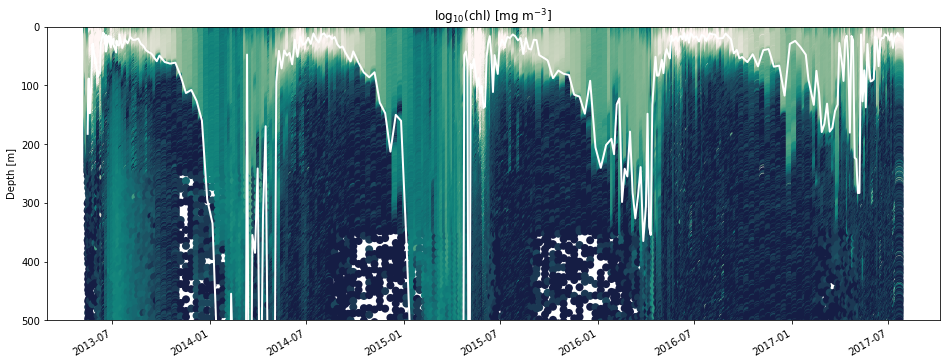

In [42]:
%pylab inline
import bioargo
fl = bioargo.Float()
fl.plot()

# Packaging and Poetry

```bash
$ poetry new bioargo
$ cd bioargo
$ poetry add scipy numpy matplotlib cmocean seaborn
(copy and work on files)
```


# Testing

In [ ]:
#tests/test_bioargo.py
import os

import numpy as np

import bioargo
from bioargo import __version__

DATADIR = os.path.dirname(__file__) 

def test_version():
    assert __version__ == '0.1.0'

def test_float_class():
    fl = bioargo.Float(datadir=DATADIR)
    assert hasattr(fl, "mld_time")
    assert hasattr(fl, "mld")
    
def test_load_chl():
    fl = bioargo.Float(datadir=DATADIR)
    fl.load()



```bash
$ poetry run pytest
```

# Version Control


### local install:       pip install .

### install from git:    pip install https://github.com/bror/bioargo.git

### install from pypi:   pip install bioargo